In [2]:
%matplotlib inline 
import numpy as np
import numpy.linalg as LA
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib
#ignore divide by 0 warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# pingers = (x, y, frequency)
# pingers = [(np.random.random()*100, np.random.random()*100, f) for f in range(2,5)]
pingers = np.asarray([(0, 0, 2), (100, 0, 3), (50, 100, 4)])
pinger_amp = 10
# assuming cylindrical spreading: https://dosits.org/science/advanced-topics/cylindrical-vs-spherical-spreading/
# amp_detected = amp_source / distance(m)
sound_speed = 1481 # (m/s) https://en.wikipedia.org/wiki/Speed_of_sound#Water
mic_sample_rate = 1 # Hz
robot = np.random.random(2)*100 # x, y position
print(robot, 'x, y pos')

def simulate(duration=5):
    num_samples=duration*mic_sample_rate
    # get 'duration' seconds of samples
    xs = range(num_samples)
    ys = []
    for x in xs:
        y = 0
        for pinger in pingers:
            delta = pinger[0:2] - robot
            dist = np.sqrt(np.dot(delta, delta))
            if int(x / mic_sample_rate - dist / sound_speed) % pinger[2] == 0:
                y += pinger_amp / dist
        ys.append(y)
    return xs, ys

xs, ys = simulate(10)

[24.64692931 63.9232561 ] x, y pos


4
2 0
2 1
2 2
3 0
3 1
4 0
4 1


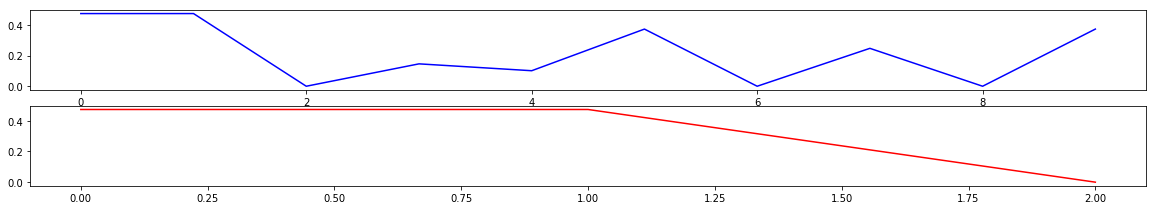

In [21]:
max_period = max(pingers, key=lambda x:x[2])[2]
print(max_period)
feature_len = max_period * mic_sample_rate - 1
features = np.zeros((len(pingers), feature_len))

for pinger in range(len(pingers)):
    period = pingers[pinger][2]
#     features[pinger, 0] = 1
    for i in range(max_period // period + 1):
        print(period, i)
        features[pinger, i * mic_sample_rate] = 1

A = features
xs_ = xs[:feature_len]
ys_ = ys[:feature_len]
amps = LA.lstsq(A.T,ys_)[0]


plt.figure(1, figsize=(20,5))
plt.subplot(311)
plt.plot(xs, ys, 'b')
plt.subplot(312)
plt.plot(xs_, amps @ features , 'r')
# plt.subplot(313)
# plt.plot(xs, ys_fft_ang, 'y')
# plt.show()

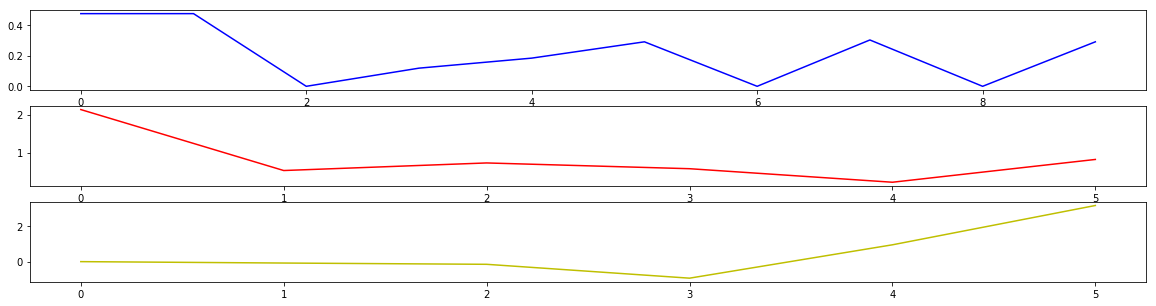

In [91]:
plt.figure(1, figsize=(20,5))
plt.subplot(311)
plt.plot(xs, ys, 'b')

ys_fft = np.fft.rfft(ys)
ys_fft_abs = np.abs(ys_fft)
ys_fft_ang = np.angle(ys_fft)
plt.subplot(312)
plt.plot(ys_fft_abs, 'r')
plt.subplot(313)
plt.plot(ys_fft_ang, 'y')
plt.show()